# 0.0 IMPORTS

In [64]:
import pandas                                          as pd
import matplotlib.pyplot                               as plt
import seaborn                                         as sns

from IPython.core.display  import HTML
from scipy                 import stats                as ss

## 0.1 Helper Function

In [62]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading Data

In [4]:
df_marketing_raw = pd.read_csv('data/bank-full.csv', sep=";", low_memory=False)
df_marketing_raw.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
30311,48,unemployed,single,basic.9y,no,yes,no,cellular,apr,thu,242,1,2,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes
35945,27,admin.,single,university.degree,no,no,no,cellular,may,mon,160,1,999,0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,no
37130,26,technician,single,university.degree,no,yes,no,cellular,aug,tue,204,2,999,1,failure,-2.9,92.201,-31.4,0.884,5076.2,no
7228,57,self-employed,single,high.school,unknown,no,no,telephone,may,thu,587,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
32520,36,admin.,married,university.degree,no,no,yes,telephone,may,fri,267,3,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


# 1.0 - DESCRIPTION OF DATA

In [5]:
df1 = df_marketing_raw.copy()

## 1.1 Rename Columns

In [6]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
cols_old = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 
            'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

cols_new = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'passed_days', 'previous', 'previous_outcome', 
            'employment_var_rate', 'consumer_price_idx', 'consumer_conf_idx', 'euribor_3m', 'nr_employed', 'y']

# rename
df1.columns = cols_new

In [8]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'passed_days', 'previous', 'previous_outcome', 'employment_var_rate',
       'consumer_price_idx', 'consumer_conf_idx', 'euribor_3m', 'nr_employed',
       'y'],
      dtype='object')

## 1.2 Data Dimensions

In [9]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )
# Evaluate the possibilite do use this project in your computer

Number of Rows: 41188
Number of Cols: 21


## 1.3 Data Types

In [10]:
df1.dtypes

age                      int64
job                     object
marital                 object
education               object
default                 object
housing                 object
loan                    object
contact                 object
month                   object
day_of_week             object
duration                 int64
campaign                 int64
passed_days              int64
previous                 int64
previous_outcome        object
employment_var_rate    float64
consumer_price_idx     float64
consumer_conf_idx      float64
euribor_3m             float64
nr_employed            float64
y                       object
dtype: object

## 1.4 Check NA

In [11]:
df1.isna().sum()

age                    0
job                    0
marital                0
education              0
default                0
housing                0
loan                   0
contact                0
month                  0
day_of_week            0
duration               0
campaign               0
passed_days            0
previous               0
previous_outcome       0
employment_var_rate    0
consumer_price_idx     0
consumer_conf_idx      0
euribor_3m             0
nr_employed            0
y                      0
dtype: int64

In [12]:
# There are several missing values in some categorical attributes, all coded with the "unknown" label. 
# These missing values can be treated as a possible class label or using deletion or imputation techniques.

# In this first moment I will transform "unknown" to NaN
df1.replace( {'unknown': np.nan}, inplace=True )

In [13]:
df1.isna().sum()

age                       0
job                     330
marital                  80
education              1731
default                8597
housing                 990
loan                    990
contact                   0
month                     0
day_of_week               0
duration                  0
campaign                  0
passed_days               0
previous                  0
previous_outcome          0
employment_var_rate       0
consumer_price_idx        0
consumer_conf_idx         0
euribor_3m                0
nr_employed               0
y                         0
dtype: int64

## 1.5 Fillout NA

In [35]:
# In this first cycle of the project i will drop all the NaN values.
df1.dropna( inplace=True )

In [36]:
df1.isna().sum()

age                    0
job                    0
marital                0
education              0
default                0
housing                0
loan                   0
contact                0
month                  0
day_of_week            0
duration               0
campaign               0
passed_days            0
previous               0
previous_outcome       0
employment_var_rate    0
consumer_price_idx     0
consumer_conf_idx      0
euribor_3m             0
nr_employed            0
y                      0
dtype: int64

In [38]:
print( 'Number of rows: {}'.format( df1.shape[0] ) ) 
print( 'Number of columns: {}'.format( df1.shape[1] ) )

Number of rows: 30488
Number of columns: 21


## 1.6 Check Unbalanced Data

In [46]:
df1['id'] = df1.index
df1['id'] = df1['id'].apply( lambda x: str(x) )

In [50]:
df1 = df1[['id', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'passed_days', 'previous', 'previous_outcome', 'employment_var_rate',
       'consumer_price_idx', 'consumer_conf_idx', 'euribor_3m', 'nr_employed', 'y']]

In [47]:
df_balanced = df1[['id', 'y']].groupby( 'y' ).count().sort_values( 'id' ).reset_index()
df_balanced['perc%'] = 100*np.round( ( df_balanced['id'] / np.sum( df_balanced['id'] ) ), 4 )
df_balanced

,y,id,perc%
0,yes,3859,12.66
1,no,26629,87.34


## 1.7 Descriptive Analysis

### 1.7.1 General

In [52]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )
time_attributes = df1.select_dtypes( include=['datetime64[ns]'] )

#### 1.7.1.1 Numerical

In [53]:
# Central Tendency
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concatenar
ct = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
ct.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
ct

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,age,17.000,95.000,78.000,39.030012,37.000,10.333360,0.980210,1.241930
1,duration,0.000,4918.000,4918.000,259.484092,181.000,261.709970,3.389576,22.260612
2,campaign,1.000,43.000,42.000,2.521451,2.000,2.720106,4.896935,38.166350
3,passed_days,0.000,999.000,999.000,956.332295,999.000,201.369989,-4.507905,18.322776
4,previous,0.000,7.000,7.000,0.194273,0.000,0.522779,3.594607,17.683493
5,employment_var_rate,-3.400,1.400,4.800,-0.071510,1.100,1.610373,-0.548920,-1.271528
6,consumer_price_idx,92.201,94.767,2.566,93.523311,93.444,0.585365,-0.118725,-0.863197
7,consumer_conf_idx,-50.800,-26.900,23.900,-40.602263,-41.800,4.789171,0.373947,-0.323499
8,euribor_3m,0.634,5.045,4.411,3.459938,4.856,1.777202,-0.525050,-1.632031
9,nr_employed,4963.600,5228.100,264.500,5160.813409,5191.000,75.156832,-0.893756,-0.351621


#### 1.7.1.2 Categorical

In [55]:
cat_attributes.drop( 'id', axis=1 ).describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,previous_outcome,y
count,30488,30488,30488,30488,30488,30488,30488,30488,30488,30488,30488
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,8737,17492,10412,30485,16521,25720,20443,9733,6395,25836,26629


### 1.7.2 Classes Oriented

#### 1.7.2.1 Numerical

In [59]:
aux = df1[['age', 'duration', 'campaign', 'passed_days', 'previous',
       'employment_var_rate', 'consumer_price_idx', 'consumer_conf_idx',
       'euribor_3m', 'nr_employed']].groupby( df1['y'] ).agg( 
        start_age_min      = ('age', 'min'), 
        start_age_max      = ('age', 'max'),
        start_age_mean     = ('age', 'mean'),
        start_age_median   = ('age', 'median'),
        start_age_range    = ('age', lambda x: x.max() - x.min() ),
        start_age_skew     = ('age', lambda x: x.skew() ),
        start_age_kurtosis = ( 'age', lambda x: x.kurtosis() ),
    
        start_duration_min    =   ('duration', 'min'), 
        start_duration_max    =   ('duration', 'max'),
        start_duration_mean   =   ('duration', 'mean'),
        start_duration_median =   ('duration', 'median'),
        start_duration_range  =   ('duration', lambda x: x.max() - x.min() ),
        start_duration_skew   =   ('duration', lambda x: x.skew() ),
        start_duration_kurtosis = ( 'duration', lambda x: x.kurtosis() ),
    
        end_campaign_min    =   ('campaign', 'min'), 
        end_campaign_max    =   ('campaign', 'max'),
        end_campaign_mean   =   ('campaign', 'mean'),
        end_campaign_median =   ('campaign', 'median'),
        end_campaign_range  =   ('campaign', lambda x: x.max() - x.min() ),
        end_campaign_skew   =   ('campaign', lambda x: x.skew() ),
        end_campaign_kurtosis = ( 'campaign', lambda x: x.kurtosis() ),
    
        end_passed_days_min    =   ('passed_days', 'min'), 
        end_passed_days_max    =   ('passed_days', 'max'),
        end_passed_days_mean   =   ('passed_days', 'mean'),
        end_passed_days_median =   ('passed_days', 'median'),
        end_passed_days_range  =   ('passed_days', lambda x: x.max() - x.min() ),
        end_passed_days_skew   =   ('passed_days', lambda x: x.skew() ),
        end_passed_days_kurtosis = ( 'passed_days', lambda x: x.kurtosis() ),

        start_previous_min      = ('previous', 'min'), 
        start_previous_max      = ('previous', 'max'),
        start_previous_mean     = ('previous', 'mean'),
        start_previous_median   = ('previous', 'median'),
        start_previous_range    = ('previous', lambda x: x.max() - x.min() ),
        start_previous_skew     = ('previous', lambda x: x.skew() ),
        start_previous_kurtosis = ( 'previous', lambda x: x.kurtosis() ),
    
        start_employment_var_rate_min    =   ('employment_var_rate', 'min'), 
        start_employment_var_rate_max    =   ('employment_var_rate', 'max'),
        start_employment_var_rate_mean   =   ('employment_var_rate', 'mean'),
        start_employment_var_rate_median =   ('employment_var_rate', 'median'),
        start_employment_var_rate_range  =   ('employment_var_rate', lambda x: x.max() - x.min() ),
        start_employment_var_rate_skew   =   ('employment_var_rate', lambda x: x.skew() ),
        start_employment_var_rate_kurtosis = ( 'employment_var_rate', lambda x: x.kurtosis() ),
    
        end_consumer_price_idx_min    =   ('consumer_price_idx', 'min'), 
        end_consumer_price_idx_max    =   ('consumer_price_idx', 'max'),
        end_consumer_price_idx_mean   =   ('consumer_price_idx', 'mean'),
        end_consumer_price_idx_median =   ('consumer_price_idx', 'median'),
        end_consumer_price_idx_range  =   ('consumer_price_idx', lambda x: x.max() - x.min() ),
        end_consumer_price_idx_skew   =   ('consumer_price_idx', lambda x: x.skew() ),
        end_consumer_price_idx_kurtosis = ( 'consumer_price_idx', lambda x: x.kurtosis() ),
    
        end_euribor_3m_min    =   ('euribor_3m', 'min'), 
        end_euribor_3m_max    =   ('euribor_3m', 'max'),
        end_euribor_3m_mean   =   ('euribor_3m', 'mean'),
        end_euribor_3m_median =   ('euribor_3m', 'median'),
        end_euribor_3m_range  =   ('euribor_3m', lambda x: x.max() - x.min() ),
        end_euribor_3m_skew   =   ('euribor_3m', lambda x: x.skew() ),
        end_euribor_3m_kurtosis = ( 'euribor_3m', lambda x: x.kurtosis() ),

        end_nr_employed_min    =   ('nr_employed', 'min'), 
        end_nr_employed_max    =   ('nr_employed', 'max'),
        end_nr_employed_mean   =   ('nr_employed', 'mean'),
        end_nr_employed_median =   ('nr_employed', 'median'),
        end_nr_employed_range  =   ('nr_employed', lambda x: x.max() - x.min() ),
        end_nr_employed_skew   =   ('nr_employed', lambda x: x.skew() ),
        end_nr_employed_kurtosis = ( 'nr_employed', lambda x: x.kurtosis() ))

# show table
aux

,start_age_min,start_age_max,start_age_mean,start_age_median,start_age_range,start_age_skew,start_age_kurtosis,start_duration_min,start_duration_max,start_duration_mean,start_duration_median,start_duration_range,start_duration_skew,start_duration_kurtosis,end_campaign_min,end_campaign_max,end_campaign_mean,end_campaign_median,end_campaign_range,end_campaign_skew,end_campaign_kurtosis,end_passed_days_min,end_passed_days_max,end_passed_days_mean,end_passed_days_median,end_passed_days_range,end_passed_days_skew,end_passed_days_kurtosis,start_previous_min,start_previous_max,start_previous_mean,start_previous_median,start_previous_range,start_previous_skew,start_previous_kurtosis,start_employment_var_rate_min,start_employment_var_rate_max,start_employment_var_rate_mean,start_employment_var_rate_median,start_employment_var_rate_range,start_employment_var_rate_skew,start_employment_var_rate_kurtosis,end_consumer_price_idx_min,end_consumer_price_idx_max,end_consumer_price_idx_mean,end_consumer_price_idx_median,end_consumer_price_idx_range,end_consumer_price_idx_skew,end_consumer_price_idx_kurtosis,end_euribor_3m_min,end_euribor_3m_max,end_euribor_3m_mean,end_euribor_3m_median,end_euribor_3m_range,end_euribor_3m_skew,end_euribor_3m_kurtosis,end_nr_employed_min,end_nr_employed_max,end_nr_employed_mean,end_nr_employed_median,end_nr_employed_range,end_nr_employed_skew,end_nr_employed_kurtosis
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,17,95,38.838334,37,78,0.869799,0.92533,0,4918,220.277555,163,4918,3.884386,34.989838,1,43,2.593113,2,42,4.797341,36.025855,0,999,981.438282,999,999,-7.318730,51.568578,0,7,0.148898,0,7,3.851553,21.908131,-3.4,1.4,0.115690,1.1,4.8,-0.738415,-1.022082,92.201,94.767,93.552002,93.444,2.566,-0.126480,-0.853581,0.634,5.045,3.673637,4.857,4.411,-0.766824,-1.309653,4963.6,5228.1,5171.234293,5195.8,264.5,-1.075091,0.165674
yes,18,89,40.352682,36,71,1.052770,0.71028,37,4199,530.028505,415,4162,2.039759,7.847249,1,23,2.026950,2,22,3.475810,21.286626,0,999,783.088624,999,999,-1.370759,-0.120976,0,6,0.507385,0,6,2.057207,4.823439,-3.4,1.4,-1.363281,-1.8,4.8,0.684158,-0.693904,92.201,94.767,93.325331,93.075,2.566,0.195505,-1.021723,0.634,5.045,1.985306,1.262,4.411,1.084408,-0.678349,4963.6,5228.1,5088.904172,5076.2,264.5,0.374252,-1.042887


#### 1.7.2.2 Categorical

In [60]:
cat_attributes.drop( 'id', axis=1 ).groupby( 'y' ).describe()

job                      marital                        education                                 default                   housing                      loan                   contact                          month                   day_of_week                   previous_outcome                           
     count unique     top  freq   count unique      top   freq     count unique                top  freq   count unique top   freq   count unique  top   freq  count unique top   freq   count unique       top   freq  count unique  top  freq       count unique  top  freq            count unique          top   freq
y                                                                                                                                                                                                                                                                                                                        
no   26629     11  admin.  7521   26629      3  married  15436     26629      7  university.degree  8870   26629      2  no  26626   26629      2  yes  14379  26629      2  no  22446   26629      2  cellular  17170  26629     10  may  9033       26629      5  mon  5573            26629      3  nonexistent  23264
yes   3859     11  admin.  1216    3859      3  married   2056      3859      7  university.degree  1542    3859      1  no   3859    3859      2  yes   2142   3859      2  no   3274    3859      2  cellular   3273   3859     10  may   700        3859      5  thu   879             3859      3  nonexistent   2572

### 1.7.3 Predictors and Class Correlation

<AxesSubplot:>

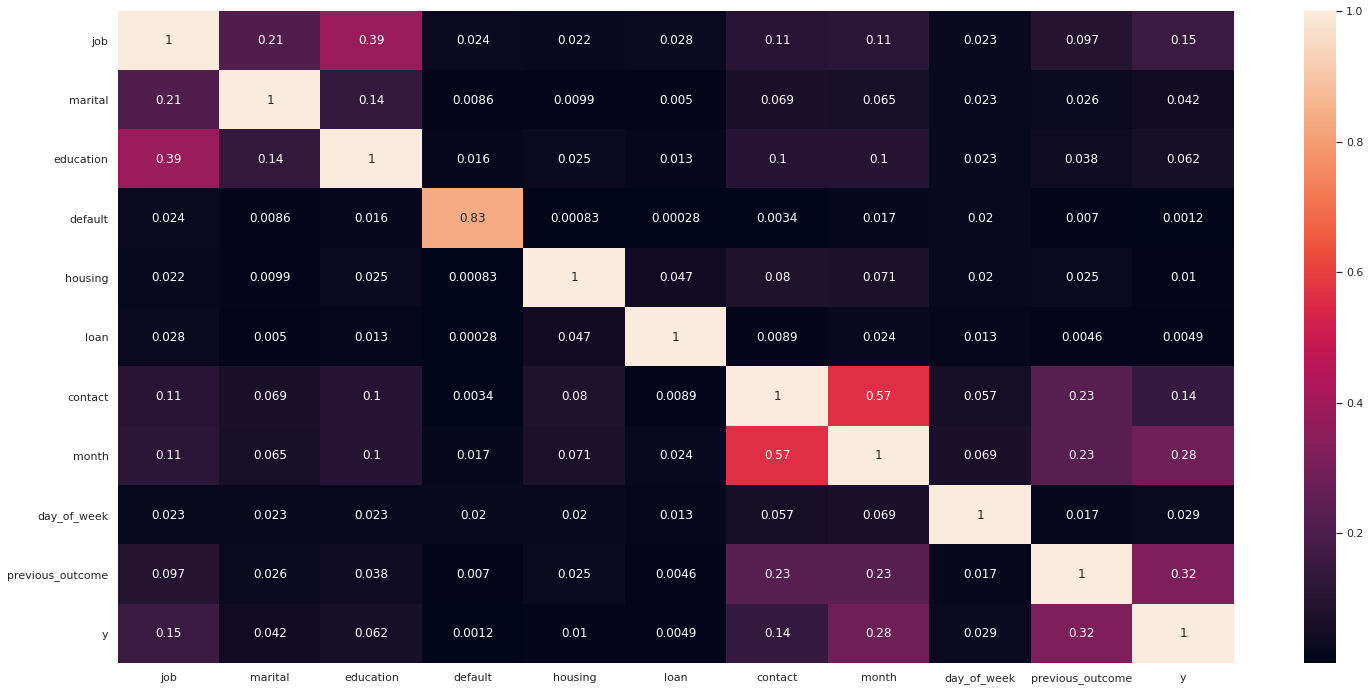

In [65]:
# list of categorical attributes
cat_attributes_list = cat_attributes.drop( 'id', axis=1 ).columns.tolist()

corr_dict = {}
for i in range( len( cat_attributes_list ) ):
    corr_list = []
    for j in range( len( cat_attributes_list ) ):
        #print( 'Ref: {} - Feat: {}'.format( cat_attributes_list[i], cat_attributes_list[j] ) )
        ref = cat_attributes_list[i]
        feat = cat_attributes_list[j]
        
        # correlation between two categorical variables
        corr = cramer_v( cat_attributes[ ref ], cat_attributes[ feat ] )
        
        # append to a list
        corr_list.append( corr )
        
    # append the correlation list for each ref attributes
    corr_dict[ref] = corr_list

d = pd.DataFrame( corr_dict )
d = d.set_index( d.columns )
sns.heatmap( d, annot=True )

# 2.0 - FEATURE ENGINEERING

In [66]:
df2 = df1.copy()